## Banking Case Study

Business Understanding

Financial markets are fundamental institutions in any developing economy. They play a crucial role in promoting economic growth by facilitating the channeling of saving decisions into productive investment. A major concern for financial institutions is credit risk, because if not managed properly, it can lead to a banking collapse. 

In our banking system, banks have many products to sell but the main source of income of any bank is on its credit line. Loan is the core business part of banks. A bank's profit or a loss depends to a large extent on loans i.e. whether the customers are paying back the loan or defaulting. 

Though a lot of people are applying for loans. However, they may have some difficulty in repaying the loan, due to their own capability to repay loan, their personal monetary terms, etc.. It’s hard to select the genuine applicant, who will repay the loan. While doing the process manually, a lot of misconception may happen to select the genuine applicant. The banks hold the risk of losing the amount loaned to the borrowers, which is basically regarded as "Credit risk". 

Credit risk is the potential that a bank’s borrower or counterparty fails to meet its obligations in repaying the loan borrowed from the financial institutions ("banks").

By predicting the loan defaulters, the bank can reduce its Non-Performing Assets. This makes the study of this phenomenon very important. 

Thus, the banks need to manage the credit risks in their portfolio both at the individual borrower and transactional level, as well as to consider the linkage between credit risks and other types of risk. This is because these are criteria to assess the success/failure of any banking lending activities.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.



### Importing Required libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Exploratory Data Analysis

In [2]:

df = pd.read_csv('credit_risk_dataset.csv')

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
df.shape

(32581, 12)

In [4]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
num = df.select_dtypes(include = 'number')
num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


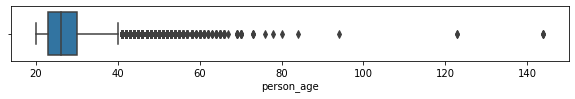

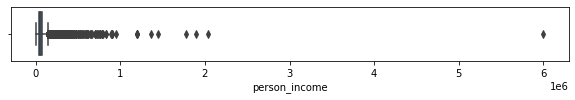

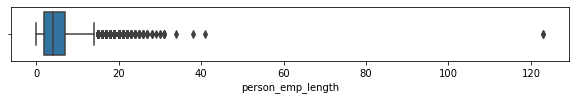

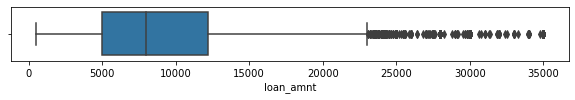

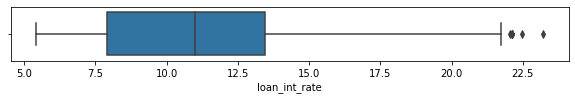

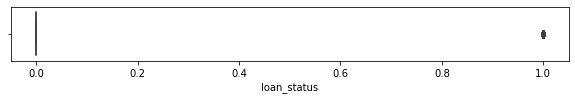

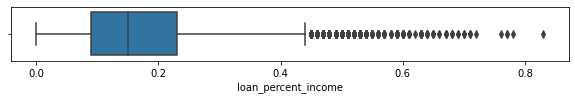

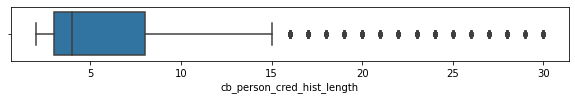

In [9]:
for column in num:
        plt.figure(figsize=(10,1))
        sns.boxplot(data=num, x=column)

Observation : - We see that every feature has outliers on positive side.

#### Filling Null-values

In [10]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [11]:
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].median())

In [12]:
df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [13]:
print(len(df['person_age']))


32581


### Outliers  Removal

In [14]:

q1 = df['person_age'].quantile(0.25)
q3 = df['person_age'].quantile(0.75)

iqr = q3 - q1
lb = q1 - (1.5*iqr)

ub = q3 + (1.5*iqr)


Outliers = df[(df['person_age'] < lb) | (df['person_age'] > ub)].index
df.drop(Outliers,inplace=True)


In [15]:
print(len(df['person_age']))

31087


In [16]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [17]:
#appling max function to each column 

df.apply(np.max)

person_age                         40
person_income                 1200000
person_home_ownership            RENT
person_emp_length               123.0
loan_intent                   VENTURE
loan_grade                          G
loan_amnt                       35000
loan_int_rate                   23.22
loan_status                         1
loan_percent_income              0.83
cb_person_default_on_file           Y
cb_person_cred_hist_length         17
dtype: object

In [18]:
pd.crosstab(df['loan_intent'], df['cb_person_default_on_file'])

cb_person_default_on_file,N,Y
loan_intent,,
DEBTCONSOLIDATION,4115,886
EDUCATION,5179,1063
HOMEIMPROVEMENT,2759,660
MEDICAL,4760,1005
PERSONAL,4274,906
VENTURE,4526,954


In [19]:
pd.crosstab(df['loan_intent'], df['loan_status'])

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,3585,1416
EDUCATION,5179,1063
HOMEIMPROVEMENT,2514,905
MEDICAL,4234,1531
PERSONAL,4131,1049
VENTURE,4655,825


### Univariate Analysis

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>]], dtype=object)

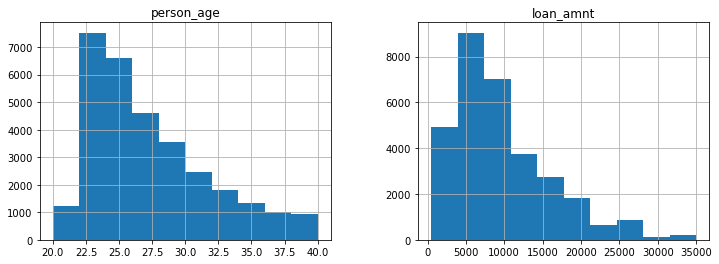

In [20]:
#Histogram plot
df[['person_age','loan_amnt']].hist(figsize=(12,4))

Observation :
-In the above plot, we see that the both the variable person_age and loan_amnt are skewed right. 

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

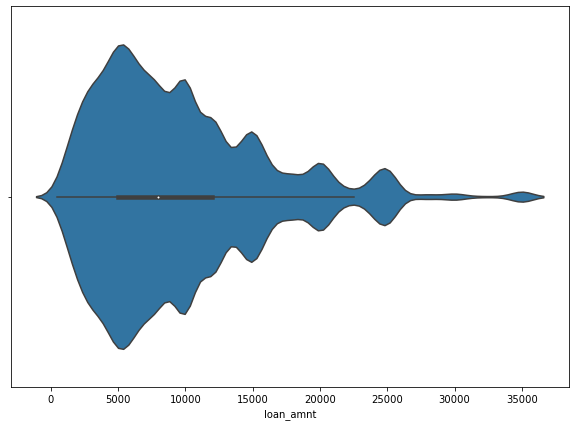

In [21]:
#Violin plot
plt.figure(figsize=(10,7))
sns.violinplot(df['loan_amnt'])



Observation :
- The density of loan_amnt is more between 1500 to 6000.

In [22]:
df['loan_status'].value_counts(normalize = True)

0    0.781613
1    0.218387
Name: loan_status, dtype: float64

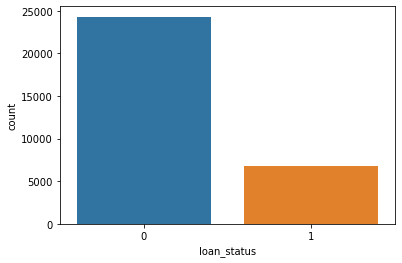

In [23]:
#countplot
sns.countplot(x='loan_status', data=df)
plt.show()


Onservation :
Chart above vividly illustrates the imbalance in our target variable.

<AxesSubplot:ylabel='loan_intent'>

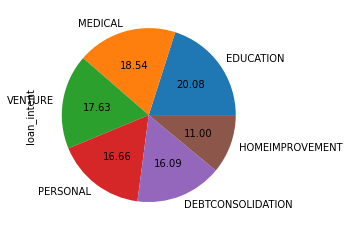

In [24]:
#Pie-chart
df['loan_intent'].value_counts().plot(kind='pie',autopct='%.2f')

## Bivariate Analysis

In [25]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<AxesSubplot:xlabel='loan_intent', ylabel='count'>

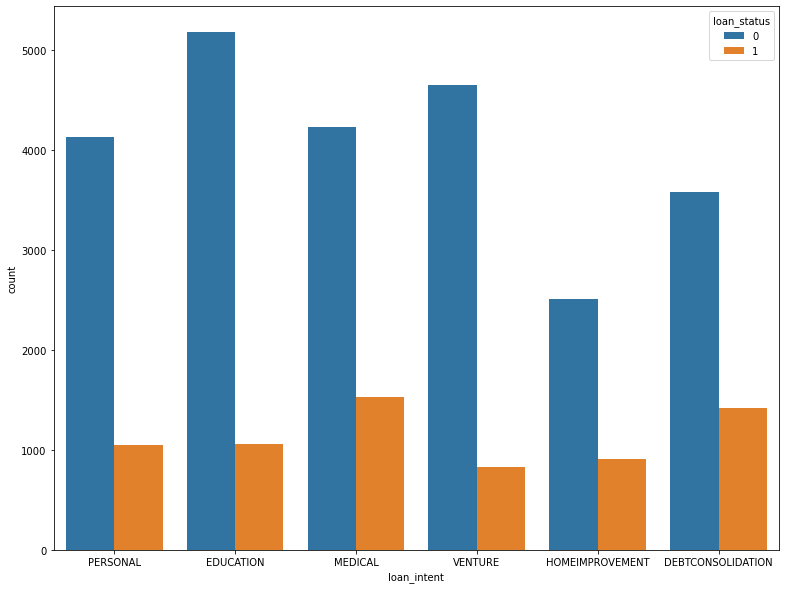

In [26]:
plt.figure(figsize = (13,10))
sns.countplot(x='loan_intent', data=df, hue='loan_status')


Observation : We see that loan_staus- 1 rate is heigher with Medical-loan_intent. 

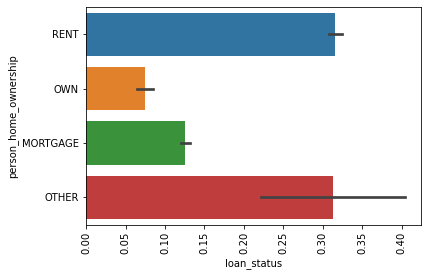

In [28]:
sns.barplot(x = 'loan_status',y = 'person_home_ownership', data = df)
plt.xticks(rotation = 90)
plt.show()

Observation : We see that loan_status is not depends on the person's age.

<AxesSubplot:xlabel='loan_status'>

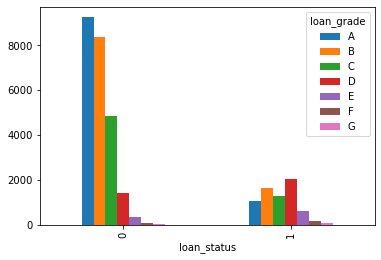

In [81]:
crosstab = pd.crosstab(df['loan_status'],df['loan_grade'])
crosstab.plot(kind='bar')

Observation : We see that grade D of loan-status '1',has more number of count.


## Multivariate-Analysis

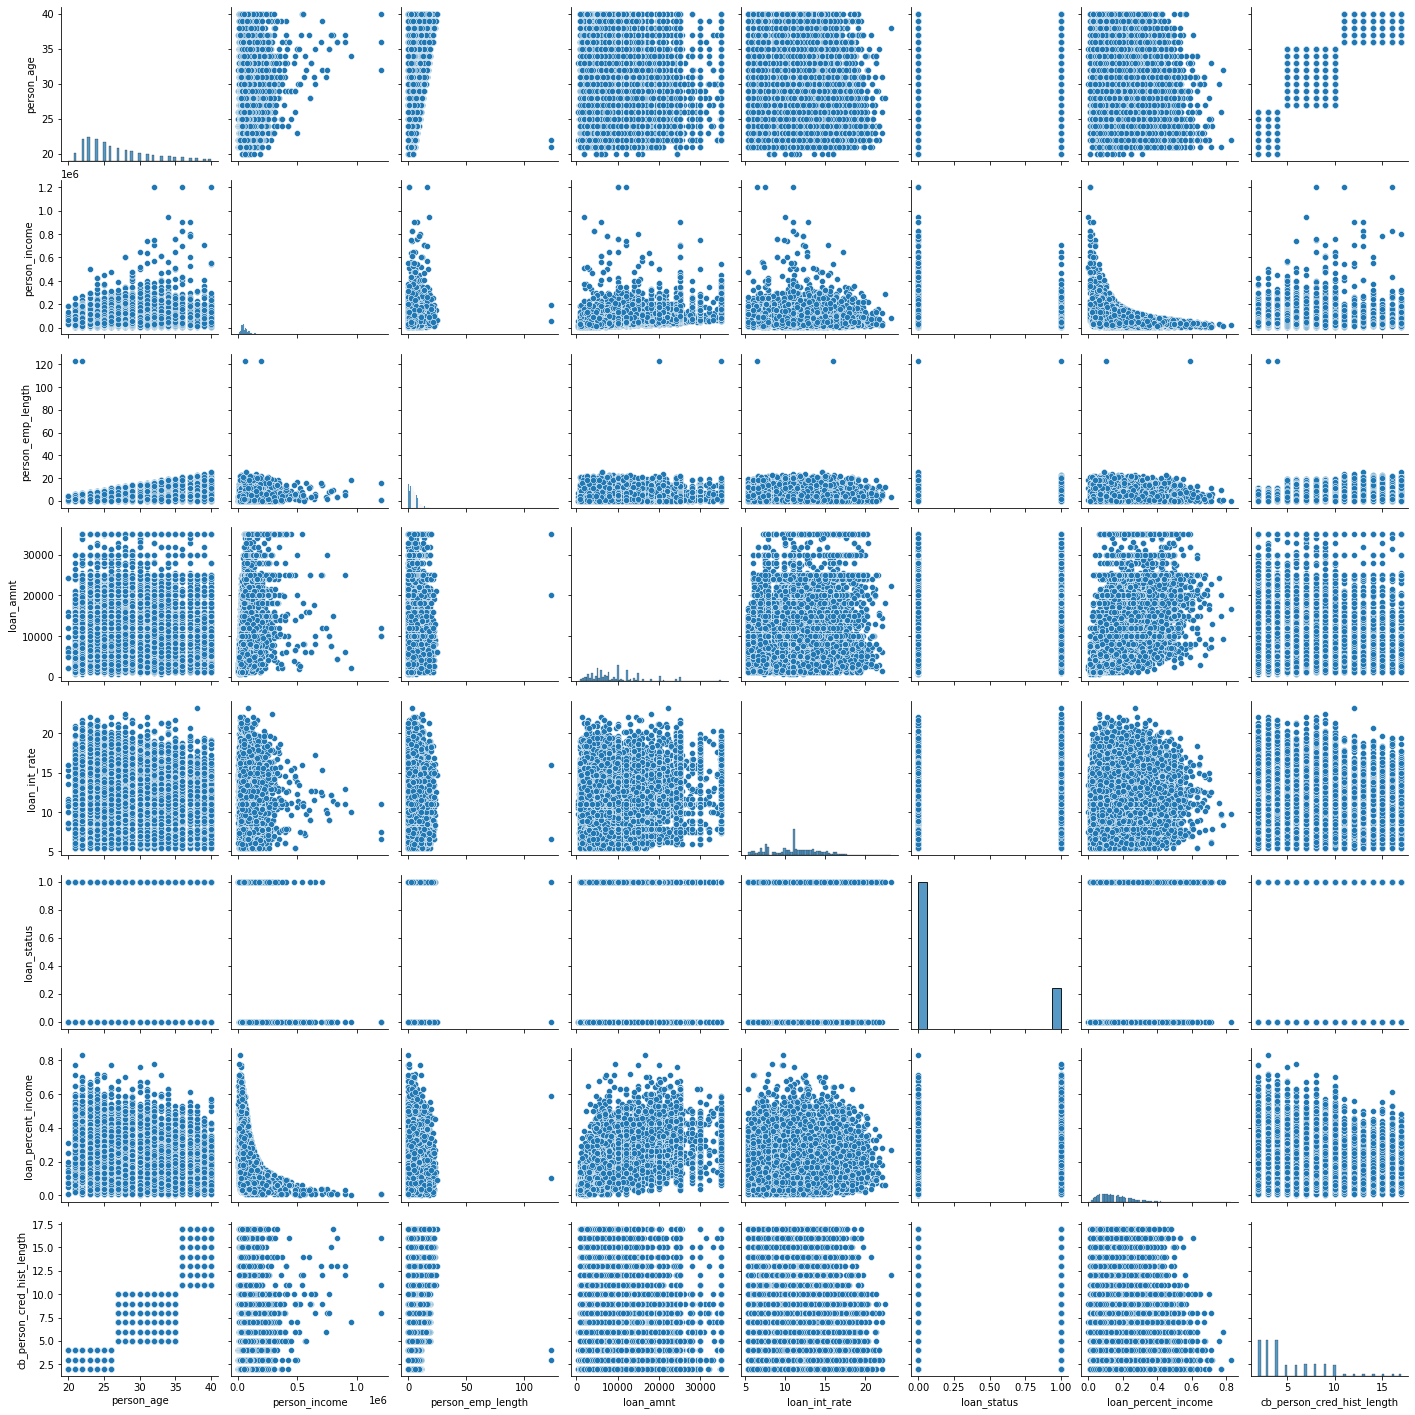

In [29]:
sns.pairplot(df)

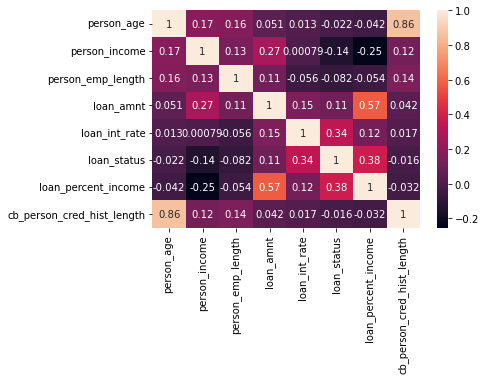

In [30]:
num_corr = num.corr()
sns.heatmap(num_corr,annot=True)
plt.show()

Observation : On above graph each square shows the correlation between the variables on each axis.Correlation ranges from -1 to +1.Values closer to zero means there is no linear trend between the two variables.

### Implementation of ML Model

In [32]:
#Seggregate input and output variables
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [33]:
X =  df [['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length','cb_person_default_on_file']]
y = df[['loan_status']]

In [34]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(23315, 11) (23315, 1)
(7772, 11) (7772, 1)


In [35]:
#Data preprocessing
X_train_num = X_train.select_dtypes(include = 'number')
X_train_cat = X_train.select_dtypes(exclude = 'number')

X_train_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
24664,28,68496,8.0,10000,10.99,0.15,5
18198,32,235000,1.0,25000,12.53,0.11,7
17587,23,69743,7.0,1000,14.11,0.01,2
22672,34,39000,0.0,7500,9.45,0.19,9
6869,22,50000,4.0,16000,9.45,0.32,4
...,...,...,...,...,...,...,...
17293,23,38004,5.0,5000,6.91,0.13,4
5196,22,44004,0.0,6300,12.29,0.14,3
12176,24,80000,2.0,5000,6.99,0.06,4
237,24,183000,2.0,20000,11.49,0.11,3


In [36]:
X_train_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
24664,RENT,PERSONAL,B,N
18198,RENT,PERSONAL,C,Y
17587,MORTGAGE,VENTURE,D,N
22672,RENT,DEBTCONSOLIDATION,B,N
6869,OWN,VENTURE,B,N
...,...,...,...,...
17293,RENT,EDUCATION,A,N
5196,MORTGAGE,PERSONAL,C,Y
12176,MORTGAGE,HOMEIMPROVEMENT,A,N
237,MORTGAGE,MEDICAL,B,N


In [37]:
#Applying rescaling on train data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_ss = pd.DataFrame(scaler.fit_transform(X_train_num),
                              columns = X_train_num.columns,
                              index = X_train_num.index)
X_train_num_ss
                        


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
24664,0.257312,0.069878,0.839970,0.064760,-0.008279,-0.192168,-0.102996
18198,1.138094,3.703968,-0.943743,2.445485,0.491342,-0.566736,0.492211
17587,-0.843666,0.097095,0.585154,-1.363675,1.003940,-1.503155,-0.995807
22672,1.578485,-0.573897,-1.198559,-0.332028,-0.507900,0.182400,1.087418
6869,-1.063861,-0.333813,-0.179295,1.017050,-0.507900,1.399745,-0.400600
...,...,...,...,...,...,...,...
17293,-0.843666,-0.595636,0.075521,-0.728815,-1.331950,-0.379452,-0.400600
5196,-1.063861,-0.464680,-1.198559,-0.522486,0.413479,-0.285810,-0.698204
12176,-0.623470,0.320962,-0.688927,-0.728815,-1.305995,-1.034945,-0.400600
237,-0.623470,2.569024,-0.688927,1.651910,0.153935,-0.566736,-0.698204


In [38]:
X_train_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
24664,RENT,PERSONAL,B,N
18198,RENT,PERSONAL,C,Y
17587,MORTGAGE,VENTURE,D,N
22672,RENT,DEBTCONSOLIDATION,B,N
6869,OWN,VENTURE,B,N
...,...,...,...,...
17293,RENT,EDUCATION,A,N
5196,MORTGAGE,PERSONAL,C,Y
12176,MORTGAGE,HOMEIMPROVEMENT,A,N
237,MORTGAGE,MEDICAL,B,N


In [39]:
#seggregate categorical data into ordinal and nominal
X_train_cat_nominal=X_train_cat.drop('loan_grade',axis=1)
X_train_cat_ordinal=X_train_cat.drop(['person_home_ownership','loan_intent','cb_person_default_on_file'],axis=1)
X_train_cat_ordinal

,loan_grade
24664,B
18198,C
17587,D
22672,B
6869,B
...,...
17293,A
5196,C
12176,A
237,B


In [40]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [41]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [42]:
df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [43]:
df['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

In [44]:
#Applying Onehotencoding on cat-nominal data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop ='first',sparse = False)
X_train_cat_Nominal_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat_nominal), 
                               columns=encoder.get_feature_names_out(X_train_cat_nominal.columns), 
                               index = X_train_cat_ordinal.index)
X_train_cat_Nominal_ohe

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
24664,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
18198,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
17587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22672,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6869,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
17293,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5196,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
12176,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
237,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [45]:
X_train_cat_ordinal_le = pd.DataFrame(index=X_train_cat_ordinal.index)

X_train_cat_ordinal_le.head()

""
24664
18198
17587
22672
6869


In [46]:
X_train_cat.loan_grade.unique()

array(['B', 'C', 'D', 'A', 'E', 'F', 'G'], dtype=object)

In [47]:
loan_encoder = {'G' : 1, 'F' : 2, 'E' : 3, 'D' : 4, 'C' : 5,'B':6,'A':7}

X_train_cat_ordinal_le['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : loan_encoder[x])

X_train_cat_ordinal_le.head()

,loan_grade
24664,6
18198,5
17587,4
22672,6
6869,6


In [48]:
X_train_cat_transformed = pd.concat([X_train_cat_Nominal_ohe,X_train_cat_ordinal_le],axis =1)
X_train_cat_transformed

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
24664,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6
18198,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5
17587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
22672,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6
6869,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...
17293,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7
5196,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5
12176,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7
237,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6


In [49]:
X_train_transformed = pd.concat([X_train_num_ss, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
24664,0.257312,0.069878,0.839970,0.064760,-0.008279,-0.192168,-0.102996,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6
18198,1.138094,3.703968,-0.943743,2.445485,0.491342,-0.566736,0.492211,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,5
17587,-0.843666,0.097095,0.585154,-1.363675,1.003940,-1.503155,-0.995807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
22672,1.578485,-0.573897,-1.198559,-0.332028,-0.507900,0.182400,1.087418,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6
6869,-1.063861,-0.333813,-0.179295,1.017050,-0.507900,1.399745,-0.400600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6


In [50]:
#Test Data

In [51]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file
31139,38,78000,MORTGAGE,19.0,VENTURE,A,4575,7.74,0.06,14,N
25273,30,60000,RENT,0.0,PERSONAL,B,12000,11.71,0.20,9,N
26940,30,48564,RENT,3.0,VENTURE,B,15000,10.75,0.31,9,N
2002,22,30000,MORTGAGE,6.0,PERSONAL,C,2000,12.61,0.07,4,N
28386,28,33600,MORTGAGE,12.0,MEDICAL,A,3000,5.42,0.09,5,N


In [52]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
31139,MORTGAGE,VENTURE,A,N
25273,RENT,PERSONAL,B,N
26940,RENT,VENTURE,B,N
2002,MORTGAGE,PERSONAL,C,N
28386,MORTGAGE,MEDICAL,A,N


In [53]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
31139,38,78000,19.0,4575,7.74,0.06,14
25273,30,60000,0.0,12000,11.71,0.20,9
26940,30,48564,3.0,15000,10.75,0.31,9
2002,22,30000,6.0,2000,12.61,0.07,4
28386,28,33600,12.0,3000,5.42,0.09,5


In [54]:
#rescaling num test data
X_test_num_ss = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_ss.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
31139,2.459268,0.277311,3.642947,-0.796269,-1.062674,-1.034945,2.575436
25273,0.697703,-0.115554,-1.198559,0.382190,0.225310,0.276042,1.087418
26940,0.697703,-0.365155,-0.434111,0.858335,-0.086142,1.306103,1.087418
2002,-1.063861,-0.770330,0.330337,-1.204960,0.517296,-0.941303,-0.400600
28386,0.257312,-0.691757,1.859234,-1.046245,-1.815349,-0.754019,-0.102996


In [55]:
#seggregate nominal and ordinal column from categorical test data
X_test_cat_nominal=X_test_cat.drop('loan_grade',axis=1)
X_test_cat_ordinal=X_test_cat.drop(['person_home_ownership','loan_intent'],axis=1)


In [56]:
#apply onehotencoding on nominal-cat column of test data
X_test_cat_Nominal_ohe = pd.DataFrame(encoder.transform(X_test_cat_nominal), 
                               columns=encoder.get_feature_names_out(X_test_cat_nominal.columns), 
                               index = X_test_cat_ordinal.index)
X_test_cat_Nominal_ohe

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
31139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25273,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
26940,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2002,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
28386,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
13866,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4418,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5615,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [57]:
#apply labelencoding on ordinal-cat column of  test data
X_test_cat_ordinal_le = pd.DataFrame(index=X_test_cat_ordinal.index)

X_test_cat_ordinal_le.head()

""
31139
25273
26940
2002
28386


In [58]:
X_test_cat_ordinal_le['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : loan_encoder[x])

X_test_cat_ordinal_le.head()

,loan_grade
31139,7
25273,6
26940,6
2002,5
28386,7


In [59]:
X_test_cat_transformed = pd.concat([X_test_cat_Nominal_ohe,X_test_cat_ordinal_le],axis =1)
X_test_cat_transformed

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
31139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7
25273,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6
26940,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
2002,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
28386,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7
...,...,...,...,...,...,...,...,...,...,...
13866,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7
182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4418,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5
5615,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5


In [60]:
X_test_transformed = pd.concat([X_test_num_ss, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
31139,2.459268,0.277311,3.642947,-0.796269,-1.062674,-1.034945,2.575436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7
25273,0.697703,-0.115554,-1.198559,0.382190,0.225310,0.276042,1.087418,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,6
26940,0.697703,-0.365155,-0.434111,0.858335,-0.086142,1.306103,1.087418,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
2002,-1.063861,-0.770330,0.330337,-1.204960,0.517296,-0.941303,-0.400600,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5
28386,0.257312,-0.691757,1.859234,-1.046245,-1.815349,-0.754019,-0.102996,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7


In [83]:
# Building of model
#logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed,y_train)
y_test_predict = classifier.predict(X_test_transformed)
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test, y_test_predict)
a

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8591096242923314

<AxesSubplot:ylabel='Count'>

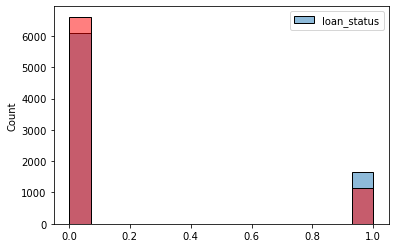

In [84]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predict, color='red', alpha=0.5)

In [85]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed,y_train)
y_test_predict = classifier.predict(X_test_transformed)
from sklearn.metrics import accuracy_score
b = accuracy_score(y_test,y_test_predict)
b

C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8925630468347916

<AxesSubplot:ylabel='Count'>

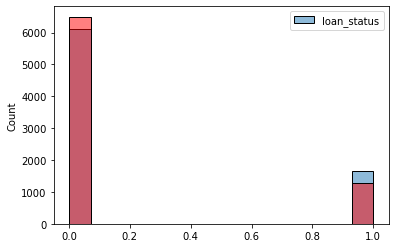

In [86]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predict, color='red', alpha=0.5)

In [87]:
#Decision-Tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed,y_train)
y_test_predict = classifier.predict(X_test_transformed)
c = accuracy_score(y_test,y_test_predict)
c

0.8939783839423572

<AxesSubplot:ylabel='Count'>

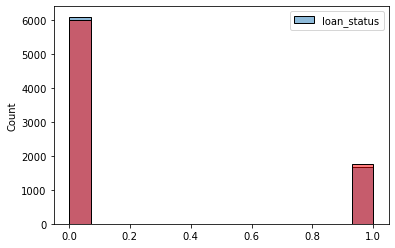

In [88]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predict, color='red', alpha=0.5)

In [89]:
#Support-vector Classifier
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed,y_train)
y_test_predict = classifier.predict(X_test_transformed)
d = accuracy_score(y_test,y_test_predict)
d

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8968090581574885

In [90]:
#RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed,y_train)
y_test_predict = classifier.predict(X_test_transformed)
e = accuracy_score(y_test_predict,y_test)
e

C:\Users\dell\AppData\Local\Temp\ipykernel_3640\4225766962.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train_transformed,y_train)


0.9397838394235718

<AxesSubplot:ylabel='Count'>

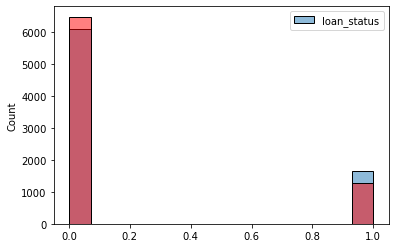

In [91]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predict, color='red', alpha=0.5)

In [92]:
df2 = pd.DataFrame({'Model':['Logistic Regression','KNN','Decision-Tree classifier','Support-vector Classifier','RandomForest Classifier'],'Accuracy_score':[a,b,c,d,e]})
df2

,Model,Accuracy_score
0,Logistic Regression,0.859110
1,KNN,0.892563
2,Decision-Tree classifier,0.893978
3,Support-vector Classifier,0.896809
4,RandomForest Classifier,0.939784


<AxesSubplot:xlabel='Accuracy_score', ylabel='Model'>

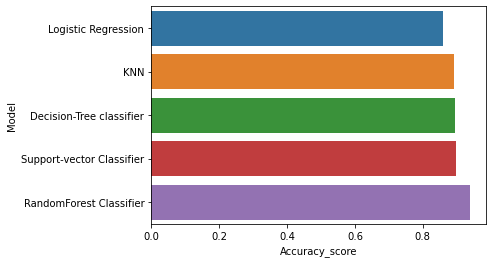

In [93]:
sns.barplot(y= df2.Model,x=df2.Accuracy_score)

## Conclusion :
- 'RandomForest Classifier' algorithm is the best model for Loan Approval prediction data-set as it is giving maximum 'Accuracy-score'.